---
# 6. CNN Model
<span id="Importmodules"></span>

---

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load the features and labels for train, validation, and test sets
X_train_features, y_train_labels = joblib.load('train_split.joblib')
X_val, y_val = joblib.load('val_split.joblib')
X_test_features, y_test_labels = joblib.load('test.joblib')

# Print the shape of the features to confirm
print(f"X_train_features shape: {X_train_features.shape}")
print(f"y_train_labels shape: {y_train_labels.shape}")
print(f"X_test_features shape: {X_test_features.shape}")
print(f"y_test_labels shape: {y_test_labels.shape}")

# Define the fully connected model for the extracted features
model = Sequential()

# Input layer (feature vectors of size 1024)
model.add(Dense(1024, activation='relu', input_shape=(X_train_features.shape[1],)))
model.add(Dropout(0.5))  # Dropout to reduce overfitting

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Output layer (number of classes)
model.add(Dense(y_train_labels.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_features, y_train_labels, 
                    epochs=10, batch_size=32, 
                    validation_data=(X_val, y_val))

X_train_features shape: (1306, 1024)
y_train_labels shape: (1306, 26)
X_test_features shape: (182, 1024)
y_test_labels shape: (182, 26)
Epoch 1/10
41/41 [==============================] - 4s 36ms/step - loss: 3.4133 - accuracy: 0.0865 - val_loss: 2.7293 - val_accuracy: 0.3211
Epoch 2/10
41/41 [==============================] - 1s 28ms/step - loss: 2.5846 - accuracy: 0.2534 - val_loss: 1.5574 - val_accuracy: 0.5902
Epoch 3/10
41/41 [==============================] - 1s 27ms/step - loss: 1.7908 - accuracy: 0.4196 - val_loss: 0.9413 - val_accuracy: 0.7156
Epoch 4/10
41/41 [==============================] - 1s 26ms/step - loss: 1.2698 - accuracy: 0.5704 - val_loss: 0.6159 - val_accuracy: 0.8624
Epoch 5/10
41/41 [==============================] - 1s 28ms/step - loss: 0.9234 - accuracy: 0.6815 - val_loss: 0.3309 - val_accuracy: 0.9052
Epoch 6/10
41/41 [==============================] - 1s 28ms/step - loss: 0.6919 - accuracy: 0.7596 - val_loss: 0.2580 - val_accuracy: 0.9297
Epoch 7/10
41/41 [

In [17]:
model.save('cnn_model.h5')

In [18]:
from tensorflow.keras.models import load_model
model = load_model('cnn_model.h5')

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_features, y_test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")

6/6 [==============================] - 0s 8ms/step - loss: 0.0880 - accuracy: 0.9670
Test accuracy: 0.9670
Test loss: 0.0880


---
# 7. Plot training and validation accuracy
<span id="Importmodules"></span>

---

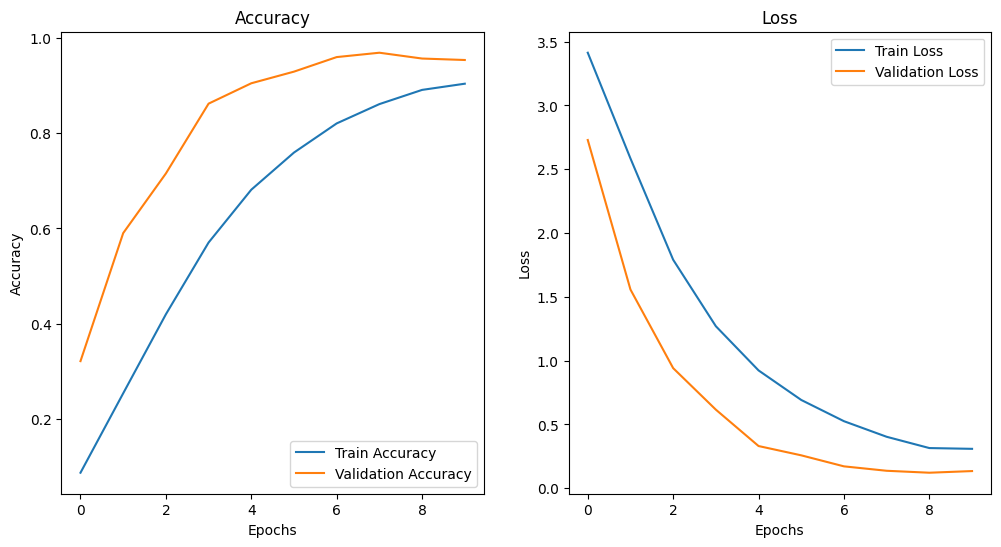

In [20]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

---
# 8. Confusion Matrix and Classification Report
<span id="Importmodules"></span>

---

6/6 [==============================] - 0s 5ms/step
Confusion Matrix:
[[7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0

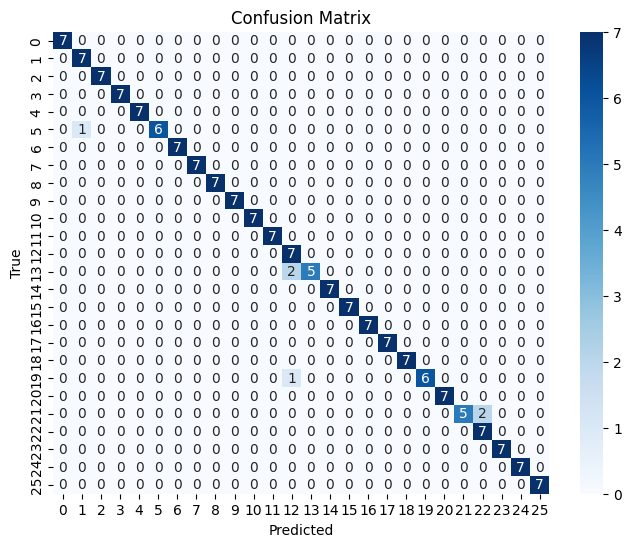

In [21]:
# Make predictions on the test set
y_pred = model.predict(X_test_features)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_labels, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(num_classes), yticklabels=np.arange(num_classes))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Extract class names from the training data generator
class_indices = train_data_gen.class_indices  # This gives a dictionary mapping class names to indices
class_names = [key for key, _ in sorted(class_indices.items(), key=lambda item: item[1])]

print("Class Names:", class_names)


Class Names: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [23]:
%pip install torch

Note: you may need to restart the kernel to use updated packages.


In [24]:

import torch
import torch.nn as nn
import torch.optim as optim

In [25]:
class FullyConnectedModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(FullyConnectedModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(256, num_classes)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

import tensorflow as tf

model_h5 = tf.keras.models.load_model('cnn_model.h5')

model_h5.summary()

import numpy as np
input_size = model_h5.input_shape[1]  
num_classes = model_h5.output_shape[1] 
pytorch_model = FullyConnectedModel(input_size, num_classes)

with torch.no_grad():

    pytorch_model.fc1.weight.copy_(torch.Tensor(model_h5.layers[0].get_weights()[0].T))
    pytorch_model.fc1.bias.copy_(torch.Tensor(model_h5.layers[0].get_weights()[1]))  

    pytorch_model.fc2.weight.copy_(torch.Tensor(model_h5.layers[2].get_weights()[0].T))
    pytorch_model.fc2.bias.copy_(torch.Tensor(model_h5.layers[2].get_weights()[1]))

    pytorch_model.fc3.weight.copy_(torch.Tensor(model_h5.layers[4].get_weights()[0].T))
    pytorch_model.fc3.bias.copy_(torch.Tensor(model_h5.layers[4].get_weights()[1]))

    pytorch_model.fc4.weight.copy_(torch.Tensor(model_h5.layers[6].get_weights()[0].T))
    pytorch_model.fc4.bias.copy_(torch.Tensor(model_h5.layers[6].get_weights()[1]))


torch.save(pytorch_model, 'model.pt')




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 26)                6